<a href="https://colab.research.google.com/github/Nitzancohen1/ML-project/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project by Nitzan Cohen and Yanai Bardosh

Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import urllib.request
from PIL import Image

Load data

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
# Let's take a look at the data
df_train

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,10474,3.0,145.0,0.0,0.0 minutes,53.0,1783.791667 minutes,1928.791667,0.007143,0.029031,...,4.0,browser_6_v12,1.0,Returning_Visitor,True,c_1,79.548460,log400,NaN,0
10475,10475,0.0,0.0,0.0,0.0 minutes,5.0,465.75 minutes,NaN,0.000000,0.021333,...,3.0,chrome_98.0.1,1.0,Returning_Visitor,True,c_8,99.457255,log202,NaN,0
10476,10476,0.0,0.0,0.0,0.0 minutes,6.0,184.25 minutes,NaN,0.083333,0.086667,...,3.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_13,94.417344,log8080,NaN,0
10477,10477,4.0,75.0,0.0,0.0 minutes,15.0,346.0 minutes,NaN,0.000000,0.021053,...,2.0,chrome_80,3.0,Returning_Visitor,False,c_11,108.919057,log400,NaN,0


Description of the data

In [3]:
df_train.describe()

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
count,10479.00000,9874.000000,10066.000000,9792.000000,10076.000000,5726.000000,10457.000000,10453.000000,10452.000000,9983.000000,10156.000000,10460.000000,10456.000000,105.000000,10479.000000
mean,5239.00000,2.321957,80.462468,0.502655,31.870187,1302.457216,0.021854,0.042859,5.900387,0.061985,2.122981,3.155641,99.769628,4.060440,0.154690
std,3025.17107,3.335331,179.217548,1.265812,44.816259,2039.312905,0.048100,0.048297,18.727496,0.199429,0.906859,2.404672,10.050268,2.189818,0.361626
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.733919,-1.235571,0.000000
25%,2619.50000,0.000000,0.000000,0.000000,7.000000,221.000000,0.000000,0.014283,0.000000,0.000000,2.000000,1.000000,93.030568,3.141657,0.000000
50%,5239.00000,1.000000,8.000000,0.000000,18.000000,677.851191,0.002968,0.025161,0.000000,0.000000,2.000000,3.000000,99.787249,4.432221,0.000000
75%,7858.50000,4.000000,93.000000,0.000000,38.000000,1605.733333,0.016667,0.050000,0.000000,0.000000,3.000000,4.000000,106.506626,5.531061,0.000000
max,10478.00000,27.000000,3398.750000,24.000000,705.000000,47850.920680,0.200000,0.200000,361.763742,1.000000,8.000000,9.000000,141.735142,7.618254,1.000000


Plot corr matrix to find out any strong correlation between the data features

<AxesSubplot:>

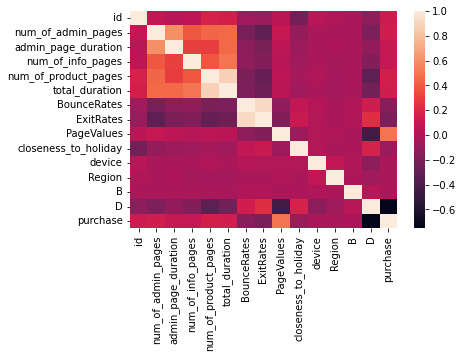

In [4]:
corr = df_train.corr()
sns.heatmap(corr)

 There is strong correlation between all the duration features to all the num of pages features
 Also there is strong correlation between D to purchase but we will find out that this feature has a lot of NaN values

<br> Plot the distribution of all the numeric feature

array([[<AxesSubplot:title={'center':'num_of_admin_pages'}>,
        <AxesSubplot:title={'center':'admin_page_duration'}>,
        <AxesSubplot:title={'center':'num_of_info_pages'}>,
        <AxesSubplot:title={'center':'num_of_product_pages'}>],
       [<AxesSubplot:title={'center':'total_duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>,
        <AxesSubplot:title={'center':'PageValues'}>],
       [<AxesSubplot:title={'center':'closeness_to_holiday'}>,
        <AxesSubplot:title={'center':'device'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'D'}>,
        <AxesSubplot:title={'center':'purchase'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

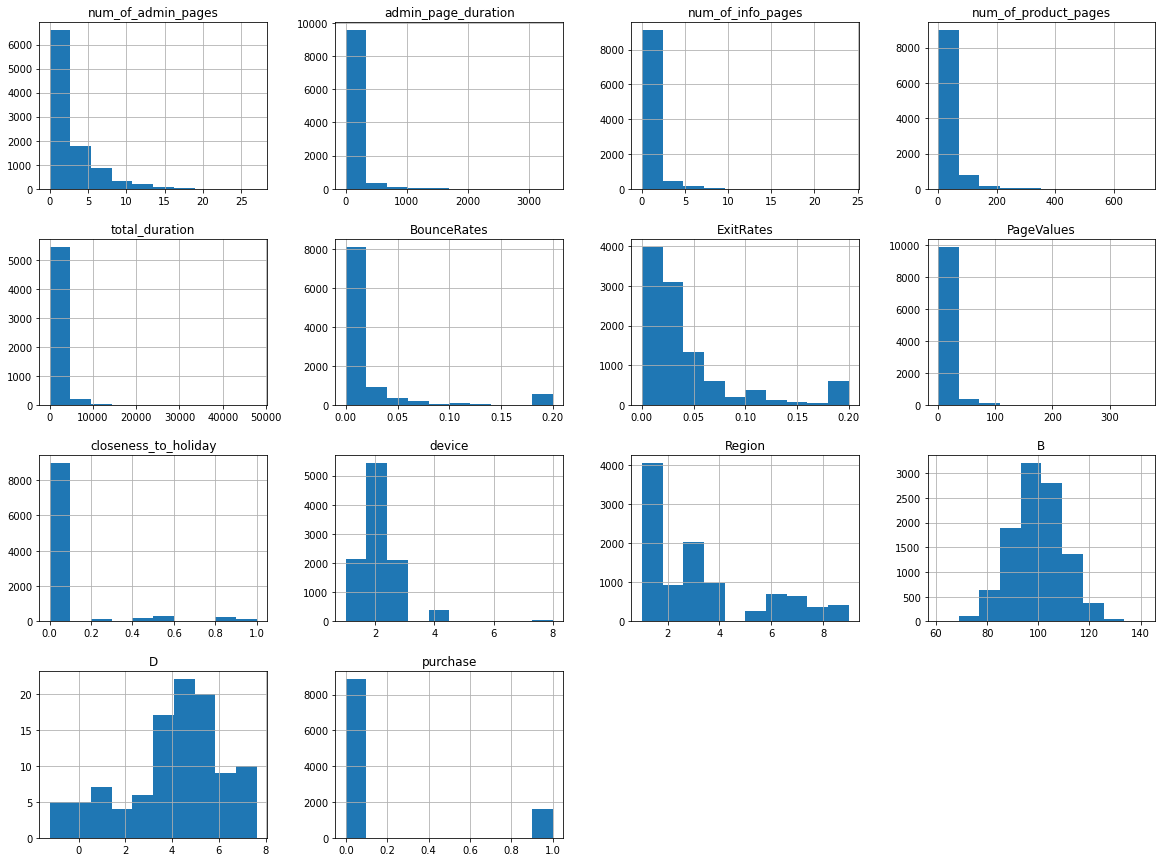

In [5]:
df_train.iloc[:,1:].hist(figsize=(20,15))

We can see that there are many more non-purchases than purchases
We can see that there are columns that are distributed closely to chi-square distribution, meaning that there are a lot of values near the zero area, and the amount of observations decreases as the values are getting higher

<br>

<br> Check not numreic columns


In [6]:
all_cols = df_train.columns
numeric = df_train.select_dtypes(include=[np.number]).columns
cat_cols = list(set(all_cols) - set(numeric))
cat_cols

['C',
 'product_page_duration',
 'Month',
 'A',
 'user_type',
 'internet_browser',
 'info_page_duration',
 'Weekend']

# Preprocessing

### dealing with numeric columns

<br> A function that aims to fulfill nan values in all the page columns 


In [7]:
def fill_na_page(df,duration_column,num_column):
    """
    Returns data frame after we fulfill nan values
    df: data frame, which we fill in nan values
    duration_column: string, the columns that have an element of time
    num_column: string, the columns that corresponding to the duration_column
    """
    # Convert num_column, when duration_column is null, to 0.0
    df.loc[df[duration_column].isnull(),num_column] = df.loc[df[duration_column].isnull(),num_column].fillna(0.0)
    # df[duration_column] from object to string
    if  df[duration_column].dtypes == object:
        df[duration_column] = df[duration_column].astype(str)
        # Remove the "minutes" from df[duration_column] 
        for i in range(len(df[duration_column])):
            if df[duration_column][i] != 'nan':
                df[duration_column][i] = df[duration_column][i][:-8] 
        # Convert duration_column values to float
        df[duration_column] = df[duration_column].astype(float)
    # We assume that if num_column == 0 so duration_column == 0
    df.loc[df[num_column] == 0.0,duration_column] = df.loc[df[num_column] == 0.0,duration_column].fillna(0.0)
    # We assume that the sum of all the duration types is equal to total duration
    # Because we decided to fill the product_page_duration last, we Convert NaN values of this column to the residual duration 
    list_median = []  
    if(duration_column == 'product_page_duration'):
        res = df['total_duration']-df['info_page_duration']-df['admin_page_duration']
        df.loc[df[duration_column].isnull(),duration_column] = df.loc[df[duration_column].isnull(),duration_column].fillna(res)
    # Fill NaN values of duration_column with the median of duration_column per num_column 
    # Bulid a list of median for fill NaN values of num_column
    for i in range(int(df[num_column].max())+1):
        mask = df[num_column] == float(i)
        median = df[duration_column][mask].median()
        df.loc[mask,duration_column] = df.loc[mask,duration_column].fillna(median)
        list_median.append(median)
    # We assume that if duration_column = 0 so num_column = 0
    df.loc[df[duration_column] == 0.0,num_column] = df.loc[df[duration_column] == 0.0,num_column].fillna(0.0)
    # Fill NaN values of num_column according to the location of his duration in list_median 
    for i in range(1,len(list_median)-1):
        avg = (list_median[i]+list_median[i+1])/2
        is_null = df[num_column].isnull()
        # Bulid conditions
        lower_bound = df[duration_column] > list_median[i]
        upper_bound = df[duration_column] < list_median[i+1]
        above_avg = df[duration_column] > avg
        under_avg = df[duration_column] < avg
        if i == 1:# Edge case
            df.loc[is_null & (df[duration_column] < list_median[i]),num_column] = i
        # Implement according to the conditions    
        df.loc[is_null & lower_bound & upper_bound & above_avg,num_column] = i+1
        df.loc[is_null & lower_bound & upper_bound & under_avg,num_column] = i 
    df.loc[is_null,num_column] = max(list_median)
    if(duration_column != 'info_page_duration'):# Edge case
        if i == len(list_median)-2:
            df.loc[is_null,num_column] = i+1
    return df

Implement the function on train data and the test data

In [8]:
df_train = fill_na_page(df_train,'info_page_duration','num_of_info_pages')
df_train = fill_na_page(df_train,'admin_page_duration','num_of_admin_pages')
df_train = fill_na_page(df_train,'product_page_duration','num_of_product_pages')

df_test = fill_na_page(df_test,'info_page_duration','num_of_info_pages')
df_test = fill_na_page(df_test,'admin_page_duration','num_of_admin_pages')
df_test = fill_na_page(df_test,'product_page_duration','num_of_product_pages')

<br> We discoverd 3 edge cases in num_of_product_pages that caused 3 missing Nan values in product_page_duration
<br> We bulid a list of them and print them

In [9]:
list1 = df_train['num_of_product_pages'][df_train['product_page_duration'].isnull()].to_list()
print(list1)

[291.0, 282.0, 351.0]


We filled them manually with the average product_page_duration of the two nearest observations according to num_of_product_pages


In [10]:
df_train.loc[df_train['id'] == 8265,'product_page_duration'] = (float(df_train.loc[df_train['id'] == 9343,'product_page_duration']) + float(df_train.loc[df_train['id'] == 5402,'product_page_duration']))/2
df_train.loc[df_train['id'] == 3021,'product_page_duration'] = (float(df_train.loc[df_train['id'] == 7354,'product_page_duration']) + float(df_train.loc[df_train['id'] == 10136,'product_page_duration']))/2
df_train.loc[df_train['id'] == 6015,'product_page_duration'] = (float(df_train.loc[df_train['id'] == 9970,'product_page_duration']) + float(df_train.loc[df_train['id'] == 9536,'product_page_duration']))/2

We filled in null values in the total_duration column by adding the corresponding columns to it


In [11]:
df_train.loc[df_train['total_duration'].isnull(),'total_duration'] = df_train.loc[df_train['total_duration'].isnull(),'total_duration'].fillna(df_train['admin_page_duration'] + df_train['info_page_duration'] + df_train['product_page_duration'])
df_test.loc[df_test['total_duration'].isnull(),'total_duration'] = df_test.loc[df_test['total_duration'].isnull(),'total_duration'].fillna(df_test['admin_page_duration'] + df_test['info_page_duration'] + df_test['product_page_duration'])

A function that fill null values of columns, with median, in train and test data

In [12]:
def fill_nan_with_median(column):
    df_train.loc[df_train[column].isnull(),column] = df_train.loc[df_train[column].isnull(),column].fillna(df_train[column].median())
    df_test.loc[df_test[column].isnull(),column] = df_test.loc[df_test[column].isnull(),column].fillna(df_test[column].median())

Fill the null values of BounceRates, ExitRates, PageValues, device, B with the median

In [13]:
fill_nan_with_median('BounceRates')
fill_nan_with_median('ExitRates')
fill_nan_with_median('PageValues')
fill_nan_with_median('device')
fill_nan_with_median('B')

 We create dummy column for D column to plot the amount of NaN and not NaN values


<AxesSubplot:xlabel='D_Dummy', ylabel='count'>

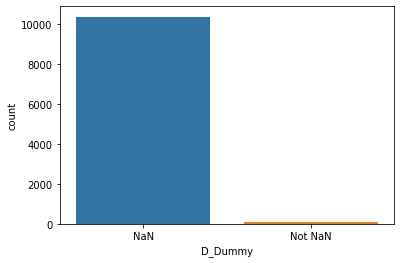

In [14]:
df_train['D_Dummy'] = ["NaN" if x == True else "Not NaN" for x in pd.isna(df_train["D"])]
sns.countplot(data = df_train , x = "D_Dummy")

It's easy to see in the graph above, that we have too many NaN values so we decided to delete D column


In [15]:
df_train = df_train.drop(['D'], axis = 1)
df_train = df_train.drop(['D_Dummy'], axis = 1)
df_test = df_test.drop(['D'], axis = 1)

 We assume that id column has no connection to purchase so we decided to delete it


In [16]:
df_train = df_train.drop(['id'], axis = 1)
df_test = df_test.drop(['id'], axis = 1)

### dealing with categorial columns

Check how many values there are of each value in internet_browser


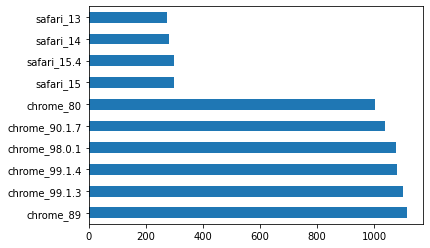

In [17]:
df_train['internet_browser'].value_counts().head(10).plot.barh()
plt.show()

We can see that chrome_89 is the most common browser

<br>

<br>  Check how many values there are of each value in user_type


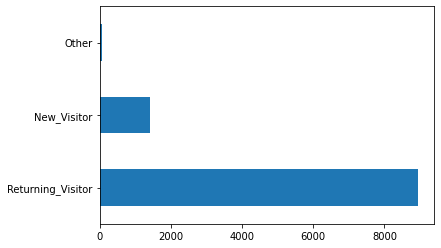

In [18]:
df_train['user_type'].value_counts().head().plot.barh()
plt.show()

 We can see that there is much more returning customers than new customers

<br>

<br>  A function for filling nan values in all the categorical columns 


In [19]:
def fill_na_value_counts(df_train,df_test,column):
    """
    Returns data frame after we fulfill nan values
    df: data frame, which we fill in nan values
    column: string, the column in the data frame where the nan values are filled
    """
    # Filling for train data
    dict1 = df_train[column].value_counts().to_dict()
    for i, key in enumerate(dict1):
       dict1[key] = i+1
    df_train[column] = df_train[column].replace(dict1)
    df_train.loc[df_train[column].isnull(),column] = df_train.loc[df_train[column].isnull(),column].fillna(df_train[column].median())
   # Filling for test data
    dict1 = df_test[column].value_counts().to_dict()
    for i, key in enumerate(dict1):
       dict1[key] = i+1
    df_test[column] = df_test[column].replace(dict1)
    df_test.loc[df_test[column].isnull(),column] = df_test.loc[df_test[column].isnull(),column].fillna(df_test[column].median())

 Replace string values of categorical columns to numbers values by ascending order,and then Fill the null values with the median 


In [20]:
fill_na_value_counts(df_train, df_test, 'internet_browser')
fill_na_value_counts(df_train, df_test, 'Month')
fill_na_value_counts(df_train, df_test, 'user_type')
fill_na_value_counts(df_train, df_test, 'A')
fill_na_value_counts(df_train, df_test, 'C')

 It's important to notice that the column closeness_to_holiday is numeric but not continuous. 
 <br>  We found that the median closeness_to_holiday of each month is 0.0, so we filled the null values of closeness_to_holiday with 0.0

In [21]:
list_median_closeness_to_holiday = []
for i in range(1,11):
    mask = df_train['Month'] == float(i)
    list_median_closeness_to_holiday.append(df_train['closeness_to_holiday'][mask].median())
    mask = df_test['Month'] == float(i)
    list_median_closeness_to_holiday.append(df_test['closeness_to_holiday'][mask].median())
print(list_median_closeness_to_holiday)
df_train.loc[df_train['closeness_to_holiday'].isnull(),'closeness_to_holiday'] = df_train.loc[df_train['closeness_to_holiday'].isnull(),'closeness_to_holiday'].fillna(0)
df_test.loc[df_test['closeness_to_holiday'].isnull(),'closeness_to_holiday'] = df_test.loc[df_test['closeness_to_holiday'].isnull(),'closeness_to_holiday'].fillna(0)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Fill the null values of Region with the median


In [22]:
fill_nan_with_median('Region')

 We convert the false values to 0 and the true values to 1 in Weekend column and then fill NaN values with the median


In [23]:
df_train['Weekend'] = df_train['Weekend'].replace({False:0,True:1})
df_test['Weekend'] = df_test['Weekend'].replace({False:0,True:1})
fill_nan_with_median('Weekend')

### dealing with outliers

A function that remove outliers according to IQR method


In [24]:
def find_outliers_IQR(df):
   """
   Returns the outliers of the data frame
   df: data frame, the data frame from which the outliers is extracted
   """
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]  
   return outliers

 We want to see the distribution of the columns(we choose product_page_duration as representative example)


<AxesSubplot:xlabel='product_page_duration', ylabel='Count'>

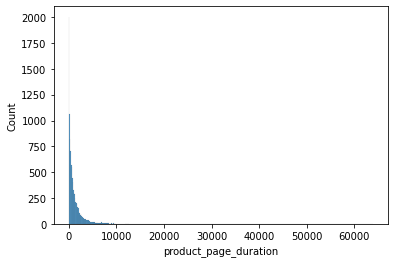

In [25]:
sns.histplot(data = df_train, x = "product_page_duration")

 We can see that the distribution of product_page_duration is close to chi square distribution

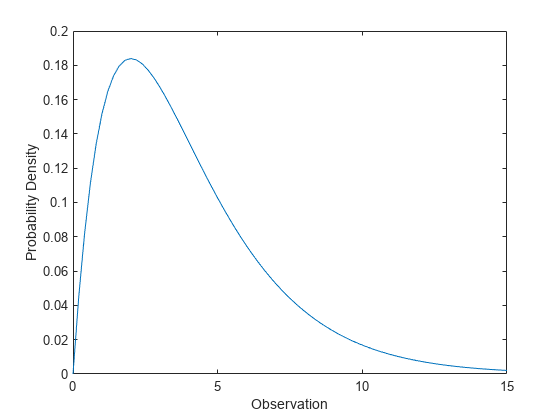

In [26]:
urllib.request.urlretrieve('https://www.mathworks.com/help/examples/stats/win64/ComputeChiSquareDistributionPdfExample_01.png',"gfg.png")
img = Image.open("gfg.png")
img

<br>

<br>  We want to see the distribution of B column


<AxesSubplot:ylabel='B'>

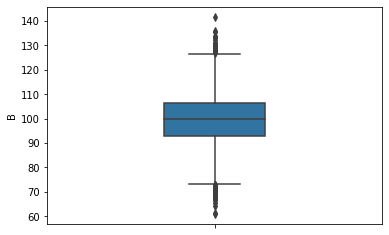

In [27]:
sns.boxplot(y = 'B',width=0.3, data = df_train)

We can see that B column is closely to normal distribution, thus the outliers will be deleted with the IQR method

<br>

<br> We can see from the output below that PageValues, info_page_duration, num_of_info_pages columns has a lot of zeros(more than 75%),
<br> so we think that if we remove the outliers it will defaced the data of this column.

In [28]:
print(df_train[df_train['PageValues']==0].shape[0])
print(df_train[df_train['info_page_duration']==0].shape[0])
print(df_train[df_train['num_of_info_pages']==0].shape[0])

8165
8429
8253


<br>

Plot ExitRates and variance


0.0023275838378990026

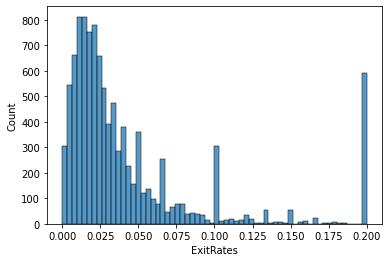

In [29]:
sns.histplot(data = df_train, x = "ExitRates")
df_train['ExitRates'].var()

<br>

Plot BounceRates and variance


0.0023095200661650975

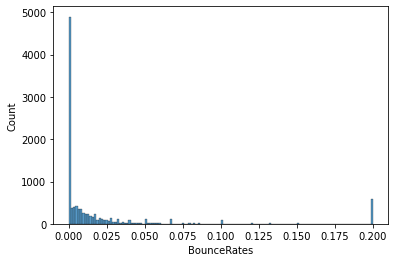

In [30]:
sns.histplot(data = df_train, x = "BounceRates")
df_train['BounceRates'].var()

We can see from the graph above, that BounceRates and ExitRates has a lot of values at both ends of the distribution. So if we decide to remove values in these areas we will deface out data

### removal of outliers
<br> **Note**: we don't remove outliers in the categorical columns

In [31]:
# We assume column B is normally distibuted according to the graph so we remove outliers according to IQR method
train_outliers = find_outliers_IQR(df_train['B'])
# The actual remove of the outliers
df_train = df_train[~df_train['B'].isin(train_outliers)]

#### plot columns that important to the prediction, to our intuition

<AxesSubplot:xlabel='product_page_duration', ylabel='total_duration'>

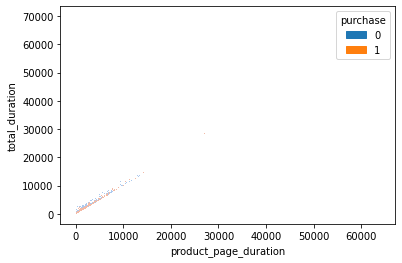

In [32]:
sns.histplot(data = df_train, x = "product_page_duration", y = "total_duration", hue = "purchase")

Based on the graph, we can say that product_page_duration is very similar to total_duration

<br>

<AxesSubplot:xlabel='Month', ylabel='count'>

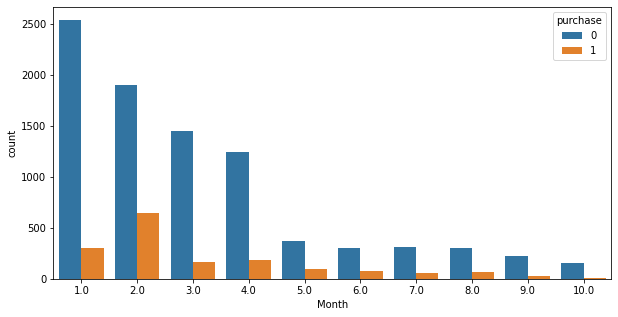

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_train , x = "Month", hue = 'purchase')

We can see that we have the highest purchase rate in the second most "busy" month and not the first 

<br>

<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

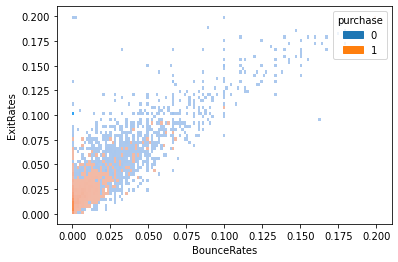

In [34]:
sns.histplot(data = df_train, x="BounceRates", y="ExitRates", hue = "purchase")

We can conclude that when the ExitRates and BounceRates are less than 0.035 we are more likely to have transaction that ended with a purchase

<br>

<AxesSubplot:xlabel='Weekend', ylabel='purchase'>

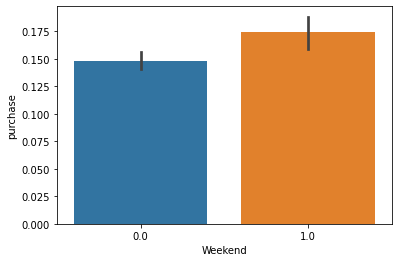

In [35]:
sns.barplot(data = df_train, x = "Weekend", y = "purchase")

We can conclude that we are more likely to have a transaction that ended with a purchase when the transaction occurred on a weekend

<br>

We want to see the connection between PageValues and total_duration with respect to purchase 

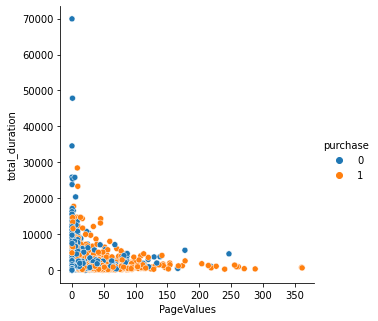

In [36]:
sns.pairplot(df_train,
            x_vars=['PageValues'],
            y_vars=['total_duration'],
            hue='purchase',
            height=4.5)

We can conclude from the graph that when PageValue and total_duration grow the chance for purchase get higher 

<br>

<AxesSubplot:xlabel='B', ylabel='Density'>

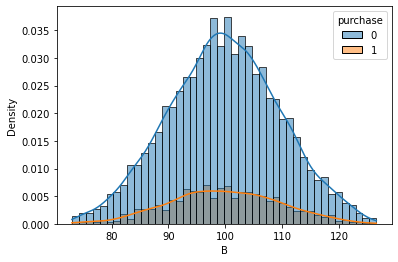

In [37]:
sns.histplot(data = df_train, x = "B", kde = True, hue = "purchase", stat = 'density')

We can conclude that B values distribution is similar to normal distribution


<br>

# Dimensionality Reduction

Large dimensionality can create a problem during computation. In addition, when the dimension of the problem is large there is a high variance which will result to low bias and therefore to overfitting.
The dimension of our problem is dependent on the complexity of the model. For a complex model we do not want to reduce dimensionality because it only hurts the running time,and there is no risk to overfitting. On the other hand, in a simple model, an overfitting problem may arise, so we would like to reduce the dimensions there. For example in logistic regression(low complexity), we do lower the dimensions, however in the random forest(high complexity) model the dimension of our problem does not change and therefore we do not lower the dimensions there. 

### PCA

Creating data train values, data train labels and data test values (without id,D columns)


In [38]:
X, y_train = df_train.values[:,:-1], df_train.values[:, -1]
y_train = y_train.astype('int')
X_test = df_test.iloc[:,:].values

# Normalize to have 0 mean and 1 variance (according to train distribution)
scaler = StandardScaler()
X_train = scaler.fit_transform(X)

# Normalize to have 0 mean and 1 variance (according to test distribution)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

A function that identify the principal components 


In [39]:
def get_principal_components(X: np.array, p: float) -> np.array:
    """
    Returns array of principal components explaining (100*p)% of the variance
    X: 2d numpy array of data we want to apply PCA on. 
    p: float in the range (0,1]. The proportion of variance explained by components
    """
    my_model = PCA(n_components = p)
    my_model.fit(X)
    return my_model.components_ 

We use the function to get the principal components 


In [40]:
components = get_principal_components(X_train,0.99)
print(f'number of components which preserve at least 99% of the variance: {len(components)}')

number of components which preserve at least 99% of the variance: 18


### Forward Selection

A function that calculate the sigma hat squared


In [41]:
def get_sigma_hat_squared(X: np.array, y: np.array, model) -> float:
    """
    Returns sigma_hat squared - an estimate of the noise variance sigma
    X: 2d np.array with the data.
    y: labels
    """ 
    model.fit(X, y)
    RSS = mean_squared_error(y, model.predict(X)) * X.shape[0]
    return (RSS / (X.shape[0] - X.shape[1] - 1))

 A function that calculate the mallows cp score


In [42]:
def get_mallows_cp_score(X: np.array ,y: np.array, sigma_hat_squared: float, model) -> float:
    """
    Returns mallow cp score for given data, selected features and train model.
    X: 2d numpy array of data with only selected features
    y: 1d numpy array of labels (also knows as target values)
    sigma_hat_squared: the estimate for noise variance
    """
    model.fit(X, y)
    MSE = mean_squared_error(y, model.predict(X))
    return MSE + (2*(X.shape[1]+1)*sigma_hat_squared)/X.shape[0]

A function that add feature (used to forward selection method)


In [43]:
def add_feature(X: np.array ,y: np.array ,current_features , sigma_hat_squared, model):
    """
    Returns dictionary with list of features including chosen feature to include and the score with selected feature
    X: 2d np array with all the features.
    y: 1d np array with the labels
    current_features: list of indexes which represent the features which are already included
    sigma_hat_squared: the estimate for noise variance
    returns: A dictionary with 2 keys:
            'features': a sorted list of indexes containing the features of the best model (with the additional feature) -> current_features + [added feature]
            'score': the mallows cp score of that model
    """
    dict1 = {}
    for x in range(X.shape[1]):
        added_features_list = current_features[:]
        if x not in current_features:
            added_features_list.append(x)
            cp_score = get_mallows_cp_score(X[:, added_features_list],y,sigma_hat_squared, model)
            dict1 [cp_score] = added_features_list
    return {'features':sorted(dict1[min(dict1.keys())]),'score': min(dict1.keys())}  

A function that implement and plotting forward selection method


In [44]:
def forward_selection(X: np.array, y: np.array, model):
    """
    returns list of indexes for the selected features
    X: 2d numpy array with original training data
    y: numpy vector with targets of training data
    returns: a sorted list containing the indexes of the selected features
    """
    num_of_features = X.shape[1]
    current_features = []
    # Calculate error on model with all features
    sigma_hat_squared = get_sigma_hat_squared(X, y, model)

    models_lst = []
    for i in range(num_of_features):
        res = add_feature(X,y,current_features,sigma_hat_squared, model)
        models_lst.append(res)
        current_features = models_lst[-1]['features']
    
    # Plotting
    scores_lst = [x['score'] for x in models_lst]
    plt.plot(range(1,len(scores_lst)+1),scores_lst)
    plt.xlabel("number of features")
    plt.ylabel("mallows cp")
    plt.title("mallows Cp score VS number of features")
    plt.show()

    #Returning features of best model, based on mallows cp score
    best_model = min(models_lst, key = lambda x: x['score'])
    best_features = best_model['features']
    return sorted(best_features)

# Useful functions for all the models

### Choose PCA or Forward Selection

A function that show us what the MSE of PCA, the MSE of forward selection and choose the better one 


In [45]:
def choose_PCA_or_forward_selection(x_forward_reduced_train, model_forward_selection, model_PCA):
    """
    Returns an array,if the PCA MSE is lower than the forwrad selection MSE, it returns array of principal components explaining (100*p)% of the variance dot train data,
    else,it returns the train data after lowering dimensions that the forward selection does.
    x: 2d np train data reduced.
    model_forward_selection: the model we worked with in forward selection
    model_PCA: the model we worked with in PCA
    """
    model_forward_selection.fit(x_forward_reduced_train, y_train)

    model_PCA.fit(x_pca_train, y_train)

    train_mse_forward =  mean_squared_error(y_train, model_forward_selection.predict(x_forward_reduced_train))
    train_mse_pca = mean_squared_error(y_train, model_PCA.predict(x_pca_train))

    print(f'MSE train - PCA: {round(train_mse_pca,6)}')
    print(f'MSE train - forward: {round(train_mse_forward,6)}')
    if train_mse_pca < train_mse_forward:
        return x_pca_train
    else:
        return x_forward_reduced_train

### Roc K-Fold

A function that does classification and ROC analysis, Run classifier with cross-validation and plot ROC curves


In [46]:
def ROC_KFOLD(data,labels,optimizer):
    """
    data: 2d np array with all the features
    labels: 1d np array with all the features
    optimizer: classifier, the classifier is optimized by cross-validation.
    """
    cv = StratifiedKFold(n_splits=10)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(data,labels)):
        optimizer.fit(data[train], labels[train])
        viz = RocCurveDisplay.from_estimator(
            optimizer,
            data[test],
            labels[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example",
    )
    ax.legend(loc="lower right")
    plt.show()

Implement PCA on X_train 


In [47]:
x_pca_train = np.dot(X_train, components.T)

# Models + choose dimension reduce method

## Logistic Regression

 Get the selected features by forward selection


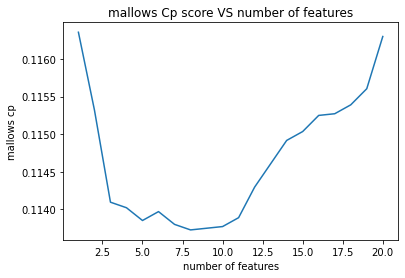

number of selected features by forward selection: 8


In [48]:
res = forward_selection(X_train,y_train, LogisticRegression())
print(f'number of selected features by forward selection: {len(res)}')

Implement forward selection on X_train 


In [49]:
x_forward_reduced_train = X_train[:,res]

Get the data with less MSE


In [50]:
x_best_dimension_reduced = choose_PCA_or_forward_selection(x_forward_reduced_train, LogisticRegression(), LogisticRegression())

MSE train - PCA: 0.115928
MSE train - forward: 0.113525


 Create train_data,validation_data ,train_labels,validation_labels using a split when 20% of the data is for a validation data, with the data after the dimension have been reduced.


In [51]:
train_data,validation_data ,train_labels,validation_labels = train_test_split(x_best_dimension_reduced,y_train,
                                                            test_size = 0.2,
                                                            random_state= 42, 
                                                            shuffle=True)

A function that finds us the optimal C in case of logistic regression


In [52]:
def find_optimal_C_logreg(lower_bound, upper_bound):    
    """
    Returns float, which represent the best C score for logistic regression using Lasso penalty.
    lower_bound: int that using for the lower bound of powers
    upper_bound: int that using for the upper bound of powers
    """
    powers = range(lower_bound, upper_bound)
    Cs = [10**p for p in powers]
    c_score = []
    for c in Cs:
        model = LogisticRegression(penalty="l2", solver = "liblinear",C=c)
        model.fit(train_data, train_labels)
        c_score.append(model.score(validation_data, validation_labels)) # Model Accuracy

    plt.plot(powers, c_score)
    plt.xlabel("Powers")
    plt.ylabel("C_score")
    plt.show()

    C_opt_lr = Cs[c_score.index(max(c_score))]
    print("The optimal lambda is: ", 1/C_opt_lr, "\n( Best C:", C_opt_lr, ")")
    return C_opt_lr

Get the best C 


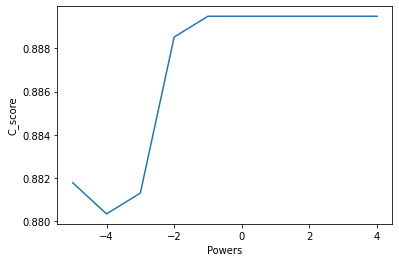

The optimal lambda is:  10.0 
( Best C: 0.1 )


In [53]:
c_opt_lr = find_optimal_C_logreg(-5, 5)

Exhaustive search over specified parameter values for an estimator.


In [54]:
Logistic_params = {'penalty': ['l1','l2','elasticnet','none'],
                    'C': [c_opt_lr],
                    'solver': ['saga','newton-cg','lbfgs','liblinear','sag'],
                    'max_iter': [100,500,1000],
                    'fit_intercept': [True,False]
}
# The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
optimizer =  GridSearchCV(LogisticRegression(), Logistic_params,scoring='roc_auc',n_jobs=4)
best_params_logistic = optimizer.fit(train_data,train_labels).best_params_

We want to see the best parameters that fit to logistic regression


In [55]:
print(f'Best Params: {best_params_logistic} \n')
logistic_with_best_params = LogisticRegression(**best_params_logistic)

Best Params: {'C': 0.1, 'fit_intercept': False, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'} 



A function that plot confusion matrix of the train data and the validation data
<br> Also it's calculate the accuracy

In [56]:
def Plot_confusion_matrix_and_data_accuracy(train_data,validation_data ,train_labels,validation_labels,model):    
    """
    Plot confusion matrix and data accuracy for train data and validation data
    train_data: 2d np array with all the train features
    validation_data:  2d np array with all the validation features
    train_labels: 1d np array with the train labels
    validation_labels: 1d np array with the validation labels
    model: the model we use for
    """
    model.fit(train_data, train_labels)

    train_pred = model.predict(train_data)
    validation_pred = model.predict(validation_data)

    confusion_matrix_train = confusion_matrix(train_labels,train_pred)
    confusion_matrix_validation = confusion_matrix(validation_labels,validation_pred)

    train_data_accuracy = model.score(train_data, train_labels)
    validation_data_accuracy = model.score(validation_data,validation_labels)
    print("Confusion matrix  train: \n",confusion_matrix_train,
            " \n Comment: C[0,0] is TN, C[0,1] is FP, C[1,0] is FN and C[1,1]  is TP"
            " \n Accuracy train:",train_data_accuracy)
    sns.heatmap(confusion_matrix_train,fmt='g',cmap='Blues', xticklabels = ["no purchase","purchase"], yticklabels = ["no purchase","purchase"])
    plt.show()
    print("Confusion matrix validation: \n",confusion_matrix_validation,
            " \n Comment: C[0,0] is TN, C[0,1] is FP, C[1,0] is FN and C[1,1]  is TP"
            " \n Accuracy validation:", validation_data_accuracy)
    sns.heatmap(confusion_matrix_validation,fmt='g',cmap='Blues', xticklabels = ["no purchase","purchase"], yticklabels = ["no purchase","purchase"])
    plt.show()

Plot confusion matrix and data accuracy of the train data and validation data


Confusion matrix  train: 
 [[6874  144]
 [ 807  497]]  
 Comment: C[0,0] is TN, C[0,1] is FP, C[1,0] is FN and C[1,1]  is TP 
 Accuracy train: 0.8857245854361933


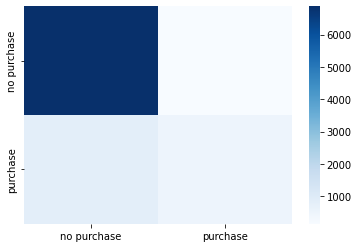

Confusion matrix validation: 
 [[1745   34]
 [ 197  105]]  
 Comment: C[0,0] is TN, C[0,1] is FP, C[1,0] is FN and C[1,1]  is TP 
 Accuracy validation: 0.888995675156175


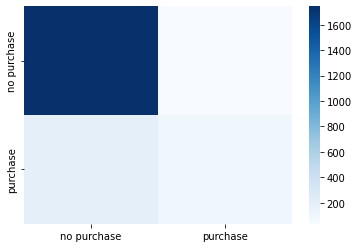

In [57]:
Plot_confusion_matrix_and_data_accuracy(train_data,validation_data ,train_labels,validation_labels, LogisticRegression(penalty = 'l2', solver='liblinear', C = c_opt_lr, intercept_scaling = 0.5))

 Plotting the ROC curve of K-fold Cross Validation, for train data using Logistic Regression


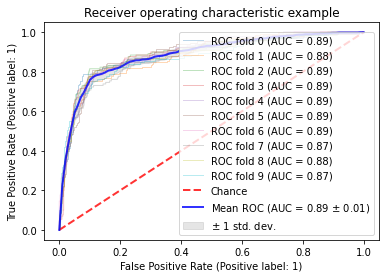

In [58]:
ROC_KFOLD(train_data, train_labels, logistic_with_best_params)

Plotting the ROC curve of K-fold Cross Validation, for validation data using Logistic Regression


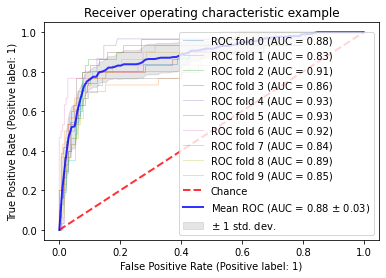

In [59]:
ROC_KFOLD(validation_data,validation_labels, logistic_with_best_params)

## Naïve Bayes Classifier

 Create a Gaussian Classifier


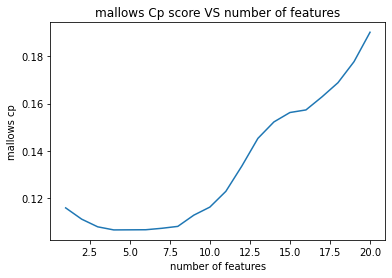

number of selected features by forward selection: 4


In [60]:
gnb = GaussianNB()
res = forward_selection(X_train,y_train, gnb)
print(f'number of selected features by forward selection: {len(res)}')


Implement forward selection

In [61]:
x_forward_reduced_train = X_train[:,res]

Calculate the test MSE for each reduced dataset

In [62]:
x_best_dimension_reduced = choose_PCA_or_forward_selection(x_forward_reduced_train, gnb, GaussianNB())
train_data,validation_data ,train_labels,validation_labels = train_test_split(x_best_dimension_reduced,y_train,
                                                            test_size = 0.2,
                                                            random_state= 42, 
                                                            shuffle=True)

MSE train - PCA: 0.158608
MSE train - forward: 0.106412


Plotting the ROC curve of K-fold Cross Validation, for train data using GaussianNB


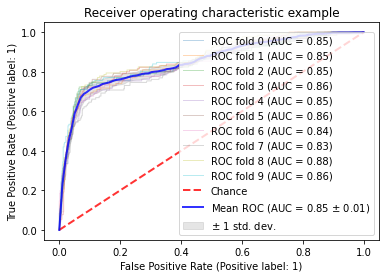

In [63]:
ROC_KFOLD(train_data, train_labels, gnb)

Plotting the ROC curve of K-fold Cross Validation, for validation data using GaussianNB


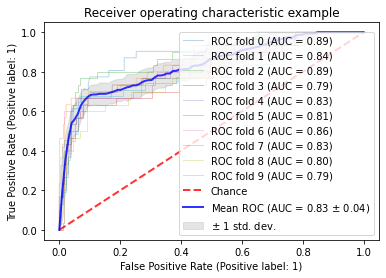

In [64]:
ROC_KFOLD(validation_data,validation_labels, gnb)

## Random Forest

 Create train_data,validation_data ,train_labels,validation_labels using a split when 20% of the data is for a validation data 


In [65]:
train_data,validation_data ,train_labels,validation_labels = train_test_split(X_train,y_train,
                                                            test_size = 0.2,
                                                            random_state= 42, 
                                                            shuffle=True)

Selecting parameters for Random Forest


In [66]:
Random_Forest_parameters = {
    'n_estimators':[150,200],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[200,None],
    'min_samples_leaf':[2,3,5],   
    'min_samples_split':[1,3,5]
}
# Creating Random Forest classifier, and choosing the best parameters for it
gscv = GridSearchCV(RandomForestClassifier(random_state=0), Random_Forest_parameters, scoring='roc_auc')
# Implement Random Forest with the best parameters
best_params_random_forest = gscv.fit(train_data, train_labels).best_params_

We want to see the best parameters that fit to Random Forest


In [67]:
print(f'Best Params: {best_params_random_forest} \n')
random_forest_with_best_params = RandomForestClassifier(**best_params_random_forest)

Best Params: {'criterion': 'entropy', 'max_depth': 200, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 200} 



We want to know what is the most important features for the Random Forest 


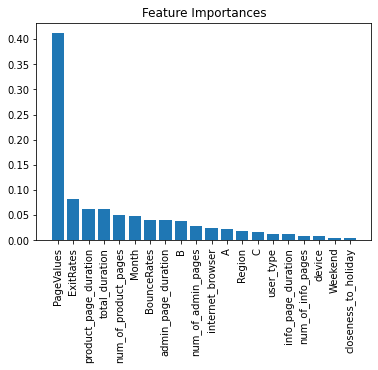

In [68]:
random_forest_with_best_params.fit(train_data, train_labels)
feature_importances = random_forest_with_best_params.feature_importances_
measures = np.argsort(feature_importances)[::-1]

names = df_train.columns[measures]

# plot
plt.figure()
plt.title("Feature Importances")
plt.bar(range(df_train.shape[1]-1), feature_importances[measures])
plt.xticks(range(df_train.shape[1]-1), names, rotation=90)
plt.show()

Plotting the ROC curve of K-fold Cross Validation, for train data using Random Forest


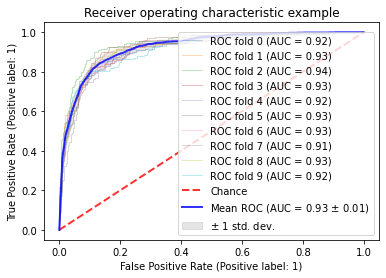

In [69]:
ROC_KFOLD(train_data,train_labels, random_forest_with_best_params)

 Plotting the ROC curve of K-fold Cross Validation, for validation data using Random Forest


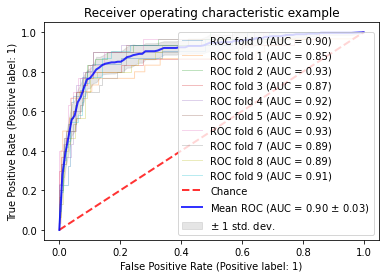

In [70]:
ROC_KFOLD(validation_data,validation_labels, random_forest_with_best_params)

## Neural Networks

Selecting parameters for Neural Networks


In [71]:
MLP_parameters = {
    'hidden_layer_sizes':[(100),(100,100),(100,100,100)],
    'solver': ['sgd', 'adam'],
    'activation': ['identity', 'logistic', 'relu'],   
}
# Creating Neural Networks classifier, and choosing the best parameters for it
mlp_grid_search = GridSearchCV(MLPClassifier(), MLP_parameters, scoring='roc_auc')
# Implement Neural Networks with the best parameters
best_params_neural_network = mlp_grid_search.fit(train_data,train_labels).best_params_

We want to see the best parameters that fit to Neural Networks


In [72]:
print(f'Best Params: {best_params_neural_network} \n')
mlp_with_best_params =  MLPClassifier(**best_params_neural_network)

Best Params: {'activation': 'logistic', 'hidden_layer_sizes': (100, 100), 'solver': 'adam'} 



Plotting the ROC curve of K-fold Cross Validation, for train data using Neural Networks


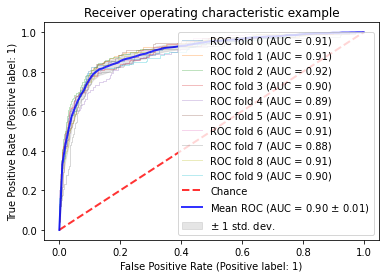

In [73]:
ROC_KFOLD(train_data,train_labels, mlp_with_best_params)

Plotting the ROC curve of K-fold Cross Validation, for validation data using Neural Networks


In [ ]:
ROC_KFOLD(validation_data,validation_labels, mlp_with_best_params)

# Prediction

In [ ]:
random_forest_with_best_params.fit(X_train, y_train)
id = pd.DataFrame({'id': [i for i in range(1,len(df_test) + 1)]})
predict_prob = pd.DataFrame({'predict_prob': random_forest_with_best_params.predict_proba(X_test)[:,1]})
  
# concatenating the DataFrames
pd.concat([id, predict_prob], join = 'outer', axis = 1).to_csv('Submission_group_33.csv', index = False)

# Pipline

In [76]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train = fill_na_page(df_train,'info_page_duration','num_of_info_pages')
df_train = fill_na_page(df_train,'admin_page_duration','num_of_admin_pages')
df_train = fill_na_page(df_train,'product_page_duration','num_of_product_pages')
df_test = fill_na_page(df_test,'info_page_duration','num_of_info_pages')
df_test = fill_na_page(df_test,'admin_page_duration','num_of_admin_pages')
df_test = fill_na_page(df_test,'product_page_duration','num_of_product_pages')
df_train.loc[df_train['id'] == 8265,'product_page_duration'] = (float(df_train.loc[df_train['id'] == 9343,'product_page_duration']) + float(df_train.loc[df_train['id'] == 5402,'product_page_duration']))/2
df_train.loc[df_train['id'] == 3021,'product_page_duration'] = (float(df_train.loc[df_train['id'] == 7354,'product_page_duration']) + float(df_train.loc[df_train['id'] == 10136,'product_page_duration']))/2
df_train.loc[df_train['id'] == 6015,'product_page_duration'] = (float(df_train.loc[df_train['id'] == 9970,'product_page_duration']) + float(df_train.loc[df_train['id'] == 9536,'product_page_duration']))/2
df_train.loc[df_train['total_duration'].isnull(),'total_duration'] = df_train.loc[df_train['total_duration'].isnull(),'total_duration'].fillna(df_train['admin_page_duration'] + df_train['info_page_duration'] + df_train['product_page_duration'])
df_test.loc[df_test['total_duration'].isnull(),'total_duration'] = df_test.loc[df_test['total_duration'].isnull(),'total_duration'].fillna(df_test['admin_page_duration'] + df_test['info_page_duration'] + df_test['product_page_duration'])
fill_nan_with_median('BounceRates')
fill_nan_with_median('ExitRates')
fill_nan_with_median('PageValues')
fill_nan_with_median('device')
fill_nan_with_median('B')
df_train = df_train.drop(['D'], axis = 1)
df_test = df_test.drop(['D'], axis = 1)
df_train = df_train.drop(['id'], axis = 1)
df_test = df_test.drop(['id'], axis = 1)
fill_na_value_counts(df_train, df_test, 'internet_browser')
fill_na_value_counts(df_train, df_test, 'Month')
fill_na_value_counts(df_train, df_test, 'user_type')
fill_na_value_counts(df_train, df_test, 'A')
fill_na_value_counts(df_train, df_test, 'C')
df_train.loc[df_train['closeness_to_holiday'].isnull(),'closeness_to_holiday'] = df_train.loc[df_train['closeness_to_holiday'].isnull(),'closeness_to_holiday'].fillna(0)
df_test.loc[df_test['closeness_to_holiday'].isnull(),'closeness_to_holiday'] = df_test.loc[df_test['closeness_to_holiday'].isnull(),'closeness_to_holiday'].fillna(0)
fill_nan_with_median('Region')
fill_nan_with_median('Weekend')
train_outliers = find_outliers_IQR(df_train['B'])
df_train = df_train[~df_train['B'].isin(train_outliers)]
X, y_train = df_train.values[:,:-1], df_train.values[:, -1]
y_train=y_train.astype('int')
X_test = df_test.iloc[:,:].values
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
train_data,validation_data ,train_labels,validation_labels = train_test_split(X_train,y_train,
                                                            test_size = 0.2,
                                                            random_state= 42, 
                                                            shuffle=True)
Random_Forest_parameters = {
    'n_estimators':[150,200],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[200,None],
    'min_samples_leaf':[2,3,5],   
    'min_samples_split':[1,3,5]
}
gscv = GridSearchCV(RandomForestClassifier(random_state=0), Random_Forest_parameters, scoring='roc_auc')
best_params_random_forest = gscv.fit(train_data, train_labels).best_params_
random_forest_with_best_params = RandomForestClassifier(**best_params_random_forest)
random_forest_with_best_params.fit(X_train, y_train)
id = pd.DataFrame({'id': [i for i in range(1,len(df_test) + 1)]})
predict_prob = pd.DataFrame({'predict_prob': random_forest_with_best_params.predict_proba(X_test)[:,1]})
pd.concat([id, predict_prob], join = 'outer', axis = 1).to_csv('Submission_group_33.csv', index = False)